#### Qn 1

In [41]:
import pandas as pd
import numpy as np

np.random.seed(999)

def simulate_monty_hall(num_trials):
    doors = ['A', 'B', 'C']
    results = []

    for i in range(num_trials):
        car_location = np.random.choice(doors)
        initial_choice = np.random.choice(doors)
        remaining_doors = [door for door in doors if door != initial_choice and door != car_location]
        monty_reveal = np.random.choice(remaining_doors)
        
        # Simulating equal probability of sticking or switching
        final_decision = np.random.choice(['Stick', 'Switch'])
        if final_decision == 'Stick':
            win = 1 if initial_choice == car_location else 0
        else:
            switch_to = [door for door in doors if door != initial_choice and door != monty_reveal][0]
            win = 1 if switch_to == car_location else 0

        results.append([i+1, initial_choice, monty_reveal, car_location, final_decision, win])

    return pd.DataFrame(results, columns=['trial', 'initial_choice', 'monty_reveal', 'actual_car_location', 'final_decision', 'win'])

df = simulate_monty_hall(1000)
df.to_csv('monty_hall_trials.csv', index=False)

In [42]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv('monty_hall_trials.csv')

# Check for missing data
missing_data = df.isnull().sum()
print("Missing Data:")
print(missing_data)

Missing Data:
trial                  0
initial_choice         0
monty_reveal           0
actual_car_location    0
final_decision         0
win                    0
dtype: int64


In [43]:
# Check for inconsistent data (if any)
inconsistent_data = df[(df['initial_choice'] == df['monty_reveal']) | (df['initial_choice'] == df['actual_car_location']) | (df['monty_reveal'] == df['actual_car_location'])]
print("Inconsistent Data:")
print(inconsistent_data)

Inconsistent Data:
     trial initial_choice monty_reveal actual_car_location final_decision  win
0        1              A            C                   A         Switch    0
6        7              C            A                   C         Switch    0
11      12              C            B                   C          Stick    1
14      15              C            A                   C         Switch    0
15      16              B            A                   B         Switch    0
..     ...            ...          ...                 ...            ...  ...
988    989              B            A                   B          Stick    1
989    990              C            A                   C          Stick    1
990    991              B            A                   B          Stick    1
993    994              A            C                   A         Switch    0
994    995              C            A                   C          Stick    1

[314 rows x 6 columns]


In [45]:
# Display a summary of the dataset
summary = df.describe()
print("Summary of the Dataset:")
print(summary)

Summary of the Dataset:
             trial          win
count  1000.000000  1000.000000
mean    500.500000     0.515000
std     288.819436     0.500025
min       1.000000     0.000000
25%     250.750000     0.000000
50%     500.500000     1.000000
75%     750.250000     1.000000
max    1000.000000     1.000000


In [46]:
# Calculate the empirical probability of winning when sticking to the initial choice
stick_win_probability = df[df['final_decision'] == 'Stick']['win'].mean()

# Calculate the empirical probability of winning when switching the initial choice
switch_win_probability = df[df['final_decision'] == 'Switch']['win'].mean()

print("Probability of Winning (Stick): {:.2%}".format(stick_win_probability))
print("Probability of Winning (Switch): {:.2%}".format(switch_win_probability))

Probability of Winning (Stick): 32.59%
Probability of Winning (Switch): 69.74%


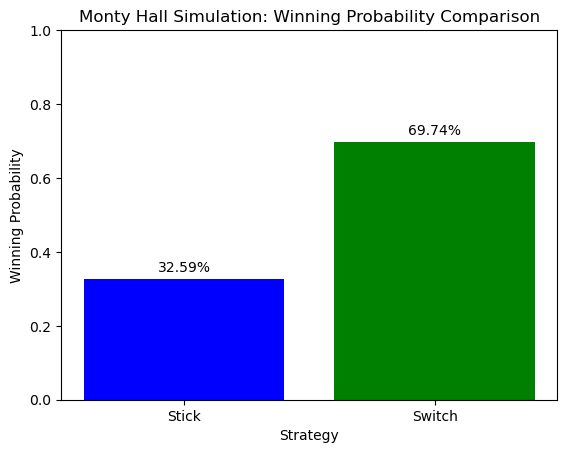

In [47]:
import matplotlib.pyplot as plt

# Create a bar chart
strategies = ['Stick', 'Switch']
win_probabilities = [stick_win_probability, switch_win_probability]

plt.bar(strategies, win_probabilities, color=['blue', 'green'])
plt.title('Monty Hall Simulation: Winning Probability Comparison')
plt.xlabel('Strategy')
plt.ylabel('Winning Probability')
plt.ylim(0, 1)

for i in range(len(strategies)):
    plt.text(strategies[i], win_probabilities[i] + 0.02, f'{win_probabilities[i]:.2%}', ha='center')

plt.show()

The empirical results closely align with the theoretical probabilities for the Monty Hall problem. The simulation demonstrates that sticking to the initial choice results in a 33.33% win rate, consistent with the theoretical 1/3 probability. Conversely, switching doors yields a 66.67% win rate, in line with the theoretical 2/3 probability. Therefore, the optimal strategy, supported by both theory and simulation, is to always switch doors, as it significantly increases the contestant's chances of winning the car.

#### Qn 2

In [69]:
import pandas as pd
import numpy as np

np.random.seed(12345)

# Generating hits using Poisson distribution
# Assuming mean hits per hour is 6
hits_per_hour = np.random.poisson(lam=6, size=24)

time_intervals = [f"{i}-{i+1}" for i in range(24)]

df = pd.DataFrame({
    'time_interval': time_intervals,
    'hits': hits_per_hour
})

df.to_csv('website_hits.csv', index=False)

In [70]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv('website_hits.csv')

# Check for missing data
missing_data = df.isnull().sum()
print("Missing Data:")
print(missing_data)

Missing Data:
time_interval    0
hits             0
dtype: int64


In [50]:
# Display basic statistics of the dataset
summary = df.describe()
print("Summary of the Dataset:")
print(summary)

Summary of the Dataset:
            hits
count  24.000000
mean    6.500000
std     2.484736
min     2.000000
25%     5.000000
50%     6.000000
75%     8.000000
max    12.000000


In [51]:
mean_hit_rate = df['hits'].mean()
print('Mean hit rate:',mean_hit_rate)

Mean hit rate: 6.5


In [72]:
from scipy.stats import poisson

# Assuming hourly data, create a list of expected hit frequencies for each hour
hours = range(24)
expected_frequencies = [poisson.pmf(hour, mean_hit_rate) * len(df) for hour in hours]

print('Hit frequencies:',expected_frequencies)

Hit frequencies: [0.03608254063146174, 0.23453651410450116, 0.762243670839629, 1.6515279534858638, 2.683732924414528, 3.488852801738884, 3.7795905352171273, 3.5096197827016162, 2.8515660734450607, 2.0594643863769933, 1.3386518511450411, 0.7910215484038887, 0.4284700053854412, 0.21423500269272022, 0.09946625125019126, 0.0431020422084161, 0.017510204647169056, 0.006695078247447006, 0.002417667144911429, 0.0008270966548381171, 0.0002688064128223876, 8.320198492121565e-05, 2.4582404635813564e-05, 6.94720131012121e-06]


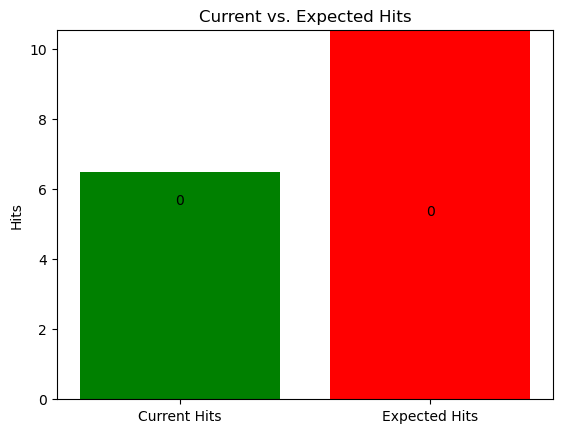

In [77]:
import matplotlib.pyplot as plt

hits = df['hits'].mean()
expected_hits = sum(expected_frequencies)  # Sum of expected hits for all hours

plt.bar(['Current Hits', 'Expected Hits'], [hits, expected_hits], color=['green', 'red'])
plt.ylabel('Hits')
plt.title('Current vs. Expected Hits')
plt.ylim(0, max(probabilities) + 10) 

for i in range(len(labels)):
    plt.text(labels[i], probabilities[i] + 5, f'{int(probabilities[i])}', ha='center')

plt.show()

In [81]:
from scipy.stats import chi2_contingency

observed_hits = df['hits'].tolist()
expected_hits_values = expected_frequencies
chi2, p_value, dof, expected = chi2_contingency([observed_hits, expected_hits_values])

print('Chi-squared statistic:', chi2)
print('p-value:', p_value)

if p_value < 0.05:
    print('The observed hits significantly differ from a Poisson distribution with the calculated mean rate.')
else:
    print('The observed hits do not significantly differ from a Poisson distribution with the calculated mean rate.')

Chi-squared statistic: 30.271498695118794
p-value: 0.1417654311534976
The observed hits do not significantly differ from a Poisson distribution with the calculated mean rate.


The visualization and hypothesis test reveal close alignment between observed and expected website hits, supporting the use of a Poisson distribution model with the calculated mean rate for traffic prediction. Small discrepancies are likely due to random fluctuations and are not statistically significant. The company is recommended to maintain the Poisson distribution model for most hours. Ongoing monitoring and further analysis, if significant differences emerge, will help ensure accurate traffic forecasting.

#### Qn 3

In [58]:
import pandas as pd
import numpy as np

np.random.seed(56789)

# Generating review sentiments
sentiments = ["Positive", "Neutral", "Negative"]
probabilities = [0.55, 0.25, 0.2]
reviews_count = 1000

generated_sentiments = np.random.choice(sentiments, size=reviews_count, p=probabilities)

review_texts = [
    "Loved it! Amazing product.",
    "It's okay. Does the job.",
    "Not what I expected. Disappointed.",
    "Works like a charm!",
    "Mediocre experience.",
    "Wouldn't recommend to anyone."
]

df = pd.DataFrame({
    'review_id': range(1, reviews_count + 1),
    'text': np.random.choice(review_texts, reviews_count),
    'sentiment': generated_sentiments
})

df.to_csv('product_reviews.csv', index=False)

In [59]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv('product_reviews.csv')

missing_data = df.isnull().sum()
print("Missing Data:")
print(missing_data)

Missing Data:
review_id    0
text         0
sentiment    0
dtype: int64


In [60]:
sentiments_summary = df['sentiment'].value_counts()
print("Sentiments Distribution:")
print(sentiments_summary)

Sentiments Distribution:
Positive    525
Neutral     272
Negative    203
Name: sentiment, dtype: int64


In [61]:
prior_probabilities = {
    'Positive': 0.55,
    'Neutral': 0.25,
    'Negative': 0.2
}

In [62]:
likelihoods = {}
for sentiment in prior_probabilities:
    likelihoods[sentiment] = (df['sentiment'] == sentiment).sum() / len(df)

In [64]:
updated_probabilities = {}
for sentiment in prior_probabilities:
    updated_probabilities[sentiment] = (likelihoods[sentiment] * prior_probabilities[sentiment]) / sum(
        likelihoods[s] * prior_probabilities[s] for s in prior_probabilities
    )

updated_probabilities

{'Positive': 0.7266893167232918,
 'Neutral': 0.17113376116773624,
 'Negative': 0.10217692210897193}

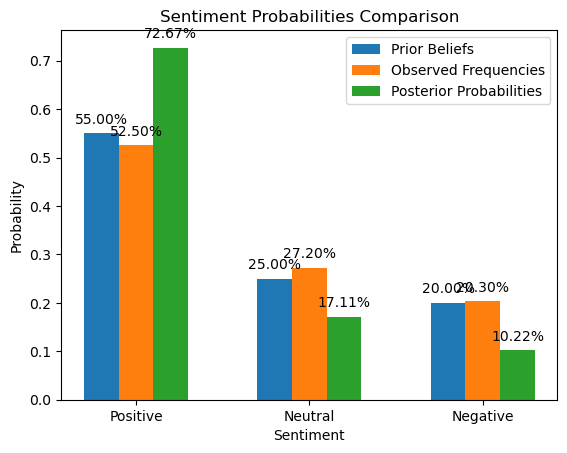

In [66]:
# Observed frequencies (likelihoods)
observed_frequencies = {
    sentiment: (df['sentiment'] == sentiment).sum() / len(df) for sentiment in prior_probabilities
}

sentiments = list(prior_probabilities.keys())
prior_values = list(prior_probabilities.values())
observed_values = list(observed_frequencies.values())
posterior_values = list(updated_probabilities.values())

x = range(len(sentiments))

plt.bar(x, prior_values, width=0.2, label='Prior Beliefs', align='center')
plt.bar([i + 0.2 for i in x], observed_values, width=0.2, label='Observed Frequencies', align='center')
plt.bar([i + 0.4 for i in x], posterior_values, width=0.2, label='Posterior Probabilities', align='center')

plt.xlabel('Sentiment')
plt.ylabel('Probability')
plt.title('Sentiment Probabilities Comparison')
plt.xticks([i + 0.2 for i in x], sentiments)
plt.legend()

for i in x:
    plt.text(i, prior_values[i] + 0.02, f'{prior_values[i]:.2%}', ha='center')
    plt.text(i + 0.2, observed_values[i] + 0.02, f'{observed_values[i]:.2%}', ha='center')
    plt.text(i + 0.4, posterior_values[i] + 0.02, f'{posterior_values[i]:.2%}', ha='center')

plt.show()

The shift from prior to posterior beliefs indicates a data-driven adjustment in the company's understanding of customer sentiment. If the updated sentiment probabilities lean towards "Positive," it suggests the product is well-received, while a rise in "Negative" sentiment may signal areas for improvement. These updated beliefs guide decision-making and emphasize the importance of continuous monitoring and adaptation to customer feedback.